In [1]:
#import 
import logging
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from umap import UMAP
import matplotlib.pyplot as plt
from reval.best_nclust_cv import FindBestClustCV

In [2]:
# set directories
main_path = '...'
data_path = os.path.join(main_path,"data")
results_path = os.path.join(main_path,"results","reval")
plot_path = os.path.join(main_path,"plot")

In [3]:
# load file already cleaned from the previous script
file = 'VABS_MSEL_24_68month_oct23.csv'
df = pd.read_csv(os.path.join(data_path,file),
                        header=0,
                        #skiprows=[1],
                        low_memory=False,
                        index_col='subjectkey')

df.drop('Unnamed: 0', 1, inplace = True)
print(df.shape)
df.head(10)

(615, 18)


/var/folders/rh/77kk2d3j49zb39gx51f0mvzr0000gq/T/ipykernel_46226/1670936797.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('Unnamed: 0', 1, inplace = True)


,interview_age_VABS,collection_id,interview_age_MELS,DQ_VR,DQ_FM,DQ_RL,DQ_EL,DQ_GM,communicationdomain_totalb,livingskillsdomain_totalb,socializationdomain_totalb,motorskillsdomain_totalb,composite_totalb,age_diff,sex,phenotype,edition,format
subjectkey,,,,,,,,,,,,,,,,,,
NDAR_INV05NXW73Y,41,2666,41,63.0,68.0,39.0,59,NaN,85.0,75,74,78.0,74.0,0,M,Childhood Autism (F84),2,survey
NDAR_INV09R9GRR7,30,2666,30,77.0,87.0,67.0,73,NaN,84.0,102,86,90.0,88.0,0,M,Atypical Autism (F84.1),2,survey
NDAR_INV0ZL8HVW9,24,2666,24,46.0,83.0,33.0,38,NaN,46.0,65,65,84.0,62.0,0,F,Childhood Autism (F84),2,survey
NDAR_INV38JW2ND8,38,2666,38,53.0,55.0,21.0,42,NaN,57.0,81,74,72.0,68.0,0,M,Childhood Autism (F84),2,survey
NDAR_INV568FMEMT,34,2666,34,29.0,32.0,9.0,26,NaN,59.0,64,61,69.0,61.0,0,F,Childhood Autism (F84),2,survey
NDAR_INV6AY1XPK6,33,2666,33,139.0,94.0,167.0,152,NaN,101.0,93,74,88.0,86.0,0,M,Childhood Autism (F84),2,survey
NDAR_INV6B2JCVZC,25,2666,36,69.0,75.0,78.0,75,NaN,89.0,93,78,105.0,89.0,-11,M,Childhood Autism (F84),2,survey
NDAR_INV6NNF1U9G,32,2666,32,62.0,66.0,16.0,38,NaN,54.0,62,70,74.0,62.0,0,M,Childhood Autism (F84),2,survey
NDAR_INVAC323FPZ,41,2368,41,73.0,88.0,49.0,63,NaN,89.0,85,77,104.0,86.0,0,M,Autism,2,survey


In [4]:
# columns names
vabs_names = ['communicationdomain_totalb','livingskillsdomain_totalb',
              'socializationdomain_totalb','motorskillsdomain_totalb']
mels_names = ["DQ_VR", "DQ_FM",
               "DQ_RL",  "DQ_EL"]
col2use = vabs_names + mels_names

In [5]:
# age : compute the mean
df['mean_age_round'] =  df[[ 'interview_age_MELS','interview_age_VABS']].mean(axis=1).round()
df['age_years_round'] = (df['mean_age_round']/12).round()
# quantile of the mean
df['quantile_age'] = pd.qcut(df['mean_age_round'], 4,labels=range(4))

In [6]:
df['age_years_round']

subjectkey
NDAR_INV05NXW73Y    3.0
NDAR_INV09R9GRR7    2.0
NDAR_INV0ZL8HVW9    2.0
NDAR_INV38JW2ND8    3.0
NDAR_INV568FMEMT    3.0
                   ... 
NDARZY028AAX        3.0
NDARZY745FRN        2.0
NDARZY876WKV        3.0
NDARZZ184CHR        2.0
NDARZZ556ECU        2.0
Name: age_years_round, Length: 615, dtype: float64

<AxesSubplot:>

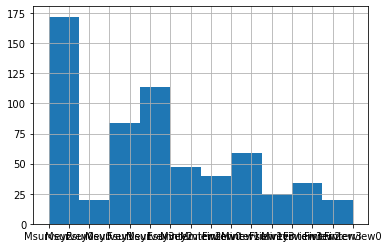

In [7]:
# define stratidfication vectors (Sex- VABS fromat- age quantile)
strat_vect = df['sex'] + df['format'] + df['quantile_age'].astype("str")
strat_vect.hist()

In [8]:
#check if statification bins have more than 1 observation each
strat_vect.value_counts()

Msurvey3       114
Msurvey0        87
Msurvey2        85
Msurvey1        73
Minterview0     40
Minterview1     31
Finterview1     28
Finterview2     28
Fsurvey3        25
Minterview2     24
Fsurvey2        23
Fsurvey0        20
Finterview0     19
Fsurvey1        11
Minterview3      6
Finterview3      1
dtype: int64

In [9]:
strat_vect.value_counts()==1

Msurvey3       False
Msurvey0       False
Msurvey2       False
Msurvey1       False
Minterview0    False
Minterview1    False
Finterview1    False
Finterview2    False
Fsurvey3       False
Minterview2    False
Fsurvey2       False
Fsurvey0       False
Finterview0    False
Fsurvey1       False
Minterview3    False
Finterview3     True
dtype: bool

In [13]:
# there is only 1 Finterview3
# I change it to Finterview2
strat_vect[strat_vect == 'Finterview3']='Finterview2'
strat_vect.value_counts()

Msurvey3       114
Msurvey0        87
Msurvey2        85
Msurvey1        73
Minterview0     40
Minterview1     31
Finterview2     29
Finterview1     28
Fsurvey3        25
Minterview2     24
Fsurvey2        23
Fsurvey0        20
Finterview0     19
Fsurvey1        11
Minterview3      6
dtype: int64

In [ ]:
# train and test split
X_tr_split, X_ts_split = train_test_split(df,
                             stratify = strat_vect,
                             test_size=0.33,
                             random_state=42)
print('there are ',X_tr_split.shape,' subject in the train set')
print('there are ',X_ts_split.shape,' subject in the test set')

<AxesSubplot:>

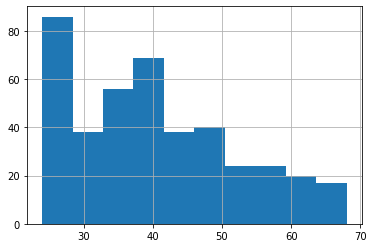

In [15]:
X_tr_split['interview_age_VABS'].hist()

<AxesSubplot:>

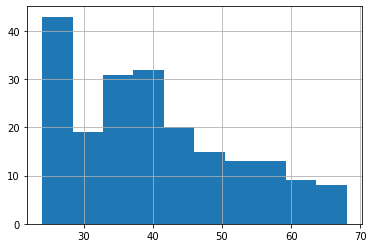

In [16]:
X_ts_split['interview_age_VABS'].hist()

In [17]:
X_tr_split.to_csv(os.path.join(results_path,'TRAIN_oct23.csv'))
X_ts_split.to_csv(os.path.join(results_path,'TEST_oct23.csv'))

In [18]:
results_path

'/Users/vmandelli/OneDrive - Fondazione Istituto Italiano Tecnologia/multiple_measures_oct23/results/reval'